In [1]:
-

In [2]:
!ls

act_vs_pred.png		  input.csv	       recs2009_public.csv
act_vs_pred_ridge.png	  make_prediction.py   regression_helpers.py
basis_expansions.py	  make_prediction.pyc  regression_helpers.pyc
basis_expansions.pyc	  model.py	       residuals.png
dftransformers.py	  model.pyc	       totsqft_uni.png
dftransformers.pyc	  pipe_model.p	       Untitled1.ipynb
Final_pipeline.ipynb	  preprocessing.py     Untitled.ipynb
final_pipeline.py	  preprocessing.pyc    website
final_pipeline.pyc	  __pycache__
green_plan_it_input.xlsx  README.md


In [3]:
df = pd.read_csv('recs2009_public.csv')


/home/ryan/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
with open('pipe_model.p', 'rb') as f:
    pipe = pickle.load(f)

/home/ryan/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ryan/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator HuberRegressor from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ryan/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
df = clean_df(df)

In [6]:
X = create_feature_dataframe(df)

In [7]:
df.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1,AUTOHEDAY,HOUSEAGE
count,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,...,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,4617.0,7053.000000
mean,5996.332341,2.641713,5.421381,14.978732,2.892812,9463.630476,3844.342691,1566.404934,3845.985680,1577.332341,...,1524.769176,167.312633,3456.434000,0.492406,6.366936,60.052744,22.175528,90.592230,0.0,37.925989
std,3464.891642,1.052885,2.875307,8.288772,1.310164,5145.848005,2344.925134,1226.662030,2296.569619,1100.002436,...,1365.785985,290.799628,2600.870087,0.084981,7.520047,9.096402,15.608460,6.253771,0.0,24.168155
min,1.000000,1.000000,1.000000,1.000000,1.000000,663.140000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-19.000000,60.000000,0.0,0.000000
25%,3004.000000,2.000000,3.000000,7.000000,2.000000,6540.320000,1507.000000,614.000000,1583.000000,759.000000,...,160.000000,6.000000,982.000000,0.420000,1.000000,52.000000,10.000000,87.000000,0.0,19.000000
50%,6002.000000,3.000000,5.000000,17.000000,2.000000,8067.490000,4131.000000,1160.000000,4137.000000,1237.000000,...,1452.000000,35.000000,3363.000000,0.490000,4.000000,59.000000,20.000000,90.000000,0.0,34.000000
75%,8960.000000,3.000000,7.000000,21.000000,4.000000,11145.470000,5705.000000,2310.000000,5686.000000,2233.000000,...,2525.000000,176.000000,5649.000000,0.560000,7.000000,67.000000,35.000000,94.000000,0.0,54.000000
max,12082.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,11679.000000,5480.000000,11472.000000,5357.000000,...,7623.000000,1884.000000,11567.000000,0.800000,33.000000,89.000000,67.000000,118.000000,0.0,89.000000


In [8]:
#X = X[X.HBUSNESS!=1]
#X = X[X.EQUIPAUX!=1]

#df = df[df.HBUSNESS!=1]
#df = df[df.EQUIPAUX!=1]

In [7]:
y = create_target(df)

In [8]:
def column_index(df, query_cols):
    """
    Creates indecies from column names to be used in OneHotEncoder
    Input 
    ------- 
    Dataframe with all columns
    query_cols columns which indicies will be returned

    Output
    -------
    Indicies of columns from input
    """


    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]


In [9]:
col_dummies_index = column_index(X, ['DIVISION','REPORTABLE_DOMAIN',
               'TYPEHUQ','Climate_Region_Pub',
               'AIA_Zone','CONDCOOP','CONVERSION','WALLTYPE','ROOFTYPE',
               'STOVENFUEL','STOVEFUEL','OVENFUEL', 'OVENUSE','AMTMICRO',
               'OUTGRILLFUEL', 'NUMMEAL','FUELFOOD', 'TVTYPE1','PCTYPE1',
               'EQUIPM', 'FUELHEAT', 'NGFPFLUE','USENGFP','DIFFUEL','EQMAMT',
               'H2OTYPE1', 'FUELH2O', 'COOLTYPE', 'FUELPOOL','FUELTUB','TYPEGLASS',
               'ADQINSUL','DRAFTY'])


In [10]:


sqft_fit = Pipeline([
    ('sqft_fit', ColumnSelector(name='TOTSQFT')),
    ('finite_add_spline', NaturalCubicSpline(knots=[500, 1000, 1500, 
                                                    2000, 4000, 5000]))
])



In [11]:

feature_pipeline = FeatureUnion([
    ('intercept', Intercept()),
    ('sqft_fit', sqft_fit)])

In [39]:
feature_pipeline.fit(df)
features = feature_pipeline.transform(df)



In [40]:
df = pd.concat([df, features], axis =1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 52)

In [42]:
pipe = Pipeline([('one_hot_encoder', OneHotEncoder(categorical_features=
                                                           col_dummies_index)),
               ('huber_model', HuberRegressor(alpha=0.001,epsilon = 1.3))])
pipe.fit(features.values, y = y_train)

IndexError: index 6 is out of bounds for axis 1 with size 6

In [15]:
energy_pred = make_prediction(pipe, X_test)


ValueError: unknown categorical feature present [7] during transform.

NameError: name 'energy_pred' is not defined

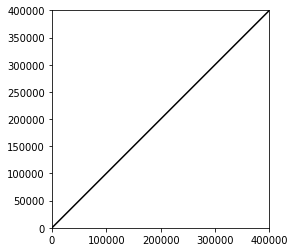

In [14]:
plt.xlim(0, 400000)
plt.ylim(0, 400000)
plt.gca().set_aspect('equal', adjustable='box')
x = np.linspace(0,400000)
plt.plot(x,x, color = 'black')


plt.scatter(y_test, energy_pred, alpha= .5)
plt.ylabel('Predicted Energy Useage')
plt.xlabel('Reported Energy Usage')
plt.rcParams["figure.figsize"] = [14,14]
plt.savefig('act_vs_pred_ridge')
plt.minorticks_on()

In [ ]:
n

In [16]:
residual = energy_pred - y_test

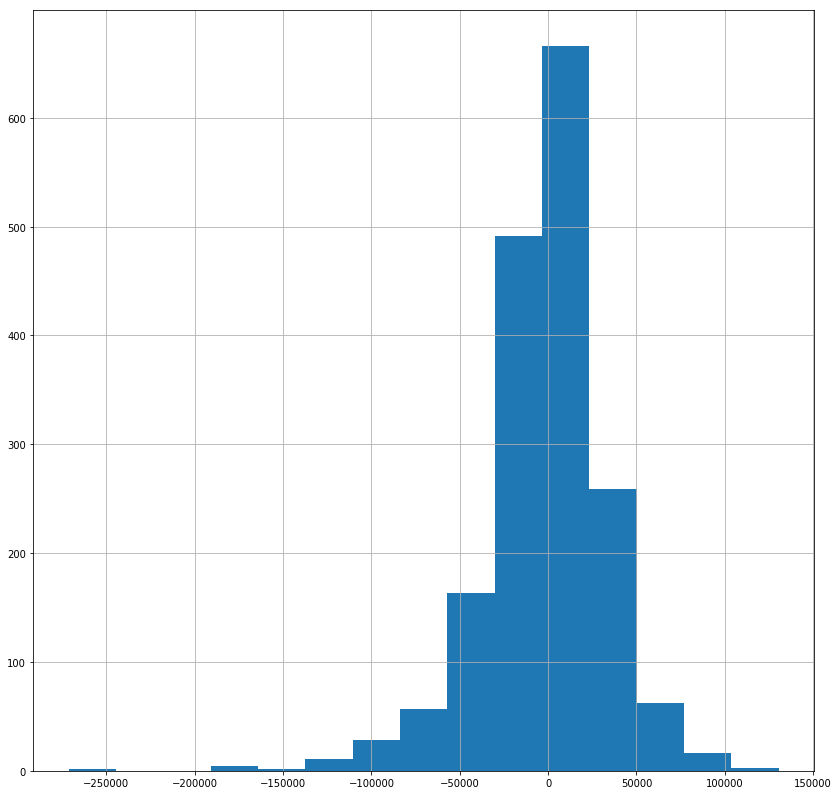

In [20]:
residual.hist(bins=15)
#plt.savefig('residual_hist')

In [13]:


plt.scatter(energy_pred, residual)
#plt.t("Residuals")
plt.ylabel('Residual')
plt.xlabel('Reported Energy Usage')
plt.savefig('residuals')
plt.minorticks_on()

NameError: name 'energy_pred' is not defined

In [24]:
pipe.score(X_test, y_test)

0.42494345117620613

In [17]:
df = pd.read_csv('recs2009_public.csv')
df = clean_df(df)

In [21]:
def plot_one_univariate(ax, var_name, mask=None):
    if mask is None:
        plot_univariate_smooth(
            ax,
            df[var_name].values.reshape(-1, 1), 
            df['KWH'],
            bootstrap=200)
    else:
        plot_univariate_smooth(
            ax,
            df[var_name].values.reshape(-1, 1), 
            df['KWH'],
            mask=mask,
            bootstrap=200)

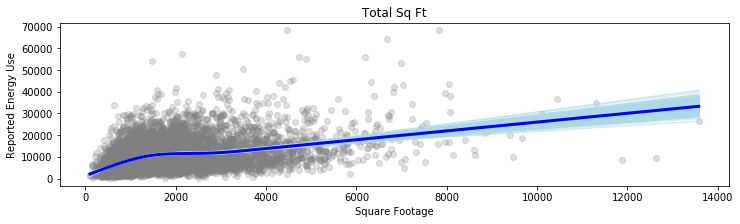

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "TOTSQFT")
ax.set_title("Total Sq Ft")
plt.ylabel('Reported Energy Use')
plt.xlabel('Square Footage')
plt.savefig('totsqft_uni')

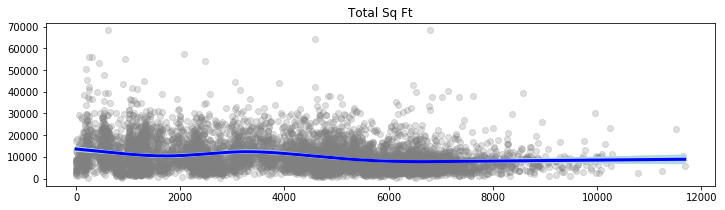

In [20]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "HDD65")
ax.set_title("Total Sq Ft")

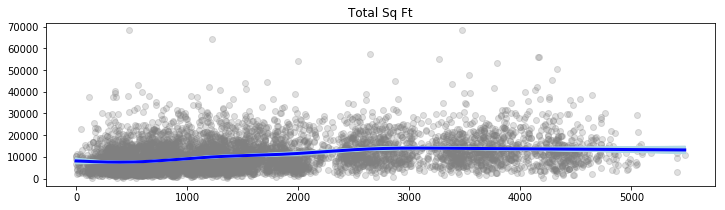

In [21]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "CDD65")
ax.set_title("Total Sq Ft")

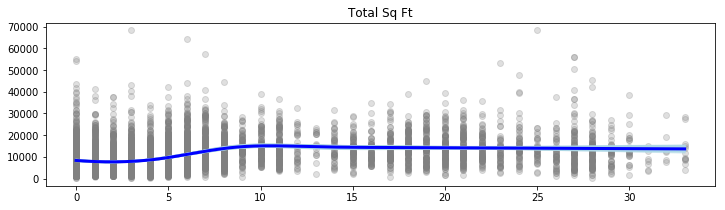

In [23]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "OA_LAT")
ax.set_title("Total Sq Ft")

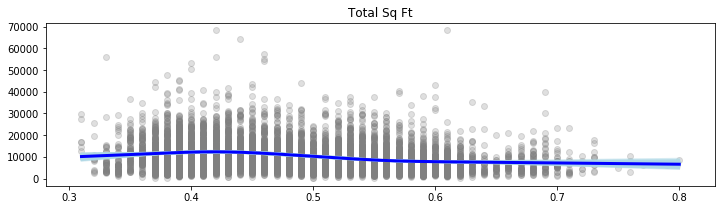

In [24]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "WSF")
ax.set_title("Total Sq Ft")

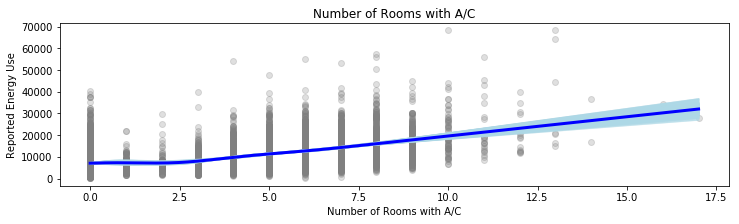

In [31]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_one_univariate(ax, "ACROOMS")
ax.set_title("Number of Rooms with A/C")
plt.ylabel('Reported Energy Use')
plt.xlabel('Number of Rooms with A/C')

In [ ]:
#df_pred = df_pred.T

In [ ]:
#new_header = df_pred.iloc[0] 
#df_pred = df_pred[1:] 
#df_pred.columns = new_header
#df_pred = df_pred.iloc[[3]]

In [ ]:
#df_pred

In [ ]:
#X, y = clean_df(df)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, random_state = 52)

In [ ]:
#ridge_model = Ridge()
#ridge_model.fit(X_train, np.log(y_train))
#energy_preds = ridge_model.predict(X_test)

In [ ]:
#plt.xlim(0, 650000)
#plt.ylim(0, 650000)
#plt.gca().set_aspect('equal', adjustable='box')
#x = np.linspace(0,650000)
#plt.plot(x,x, color = 'black')

#y_plus_20 = (2)*x
#y_minus_20 = (0.5)*x

#plt.scatter(y_test, np.exp(energy_preds), alpha= .25)
#plt.ylabel('Predicted Energy Useage')
#plt.xlabel('Reported Energy Usage')
#plt.rcParams["figure.figsize"] = [14,14]

#plt.plot(x,y_plus_20, color = 'red')
#plt.plot(x,y_minus_20, color = 'red')

In [ ]:
#df_pred = clean_df(df_pred)

In [ ]:
#test = ridge_model.predict(df_pred)